<a href="https://colab.research.google.com/github/pouyyan/ML_Course_2024/blob/main/Final/ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK

Downloading...
From: https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK
To: /content/MJMusicDataset.csv
100% 815k/815k [00:00<00:00, 45.7MB/s]


In [3]:
Data_df = pd.read_csv('/content/MJMusicDataset.csv')
Data_df

,name,dastgah,instrument,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,ney-mahoor-ebrahimi .mp3,D_2,I_4,65545,1938.040517,303472.4474,2815.166310,1.754412e+06,0.515210,0.158007,...,482.619965,274.530334,257.260315,200.793167,177.008484,89.304535,49.159683,83.412254,154.657501,417.060425
1,Mohammad_Shojaei_nei_Mahoor.mp3,D_2,I_4,59788,1956.981873,774951.2677,2971.032035,2.082504e+06,0.209722,0.335278,...,435.338196,289.941559,337.219269,266.507416,256.131317,153.390289,90.073257,120.354729,206.031006,267.015015
2,Arash_Samimi_nei_Mahoor.mp3,D_2,I_4,85072,2735.525193,575671.7929,4268.615855,2.663909e+06,0.105867,0.108526,...,299.526794,226.705948,163.451355,140.664673,104.658630,72.048088,53.397228,83.085548,190.668487,331.626526
3,19 sarebaang mahoor.mp3,D_2,I_4,89980,2629.389833,406198.9319,4071.233715,1.005496e+06,0.153988,0.098157,...,305.978638,154.510696,281.793976,348.872650,156.062454,85.470512,45.904568,120.363800,370.077820,306.180878
4,Amjadian.mp3,D_2,I_4,58134,1659.262559,332341.1003,2789.041468,8.496746e+05,0.077795,0.036009,...,81.764854,106.146141,103.081779,85.252548,90.831291,150.201111,332.417633,299.858795,177.197845,186.112488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,04- Dastgahe Segah (Dariush Safvat).mp3,D_1,I_3,58713,1962.963101,271920.3527,3971.409319,1.610546e+06,0.333098,0.462040,...,81.730835,65.873344,73.287697,61.341614,60.234592,45.930950,55.934483,79.716232,58.860054,63.929264
922,setar.mp3,D_1,I_3,76880,2250.524645,239123.6804,3555.770165,2.224720e+06,0.273377,0.446400,...,130.240204,138.122086,146.750397,181.701019,258.374176,278.515472,189.078796,83.102943,121.233650,144.402054
923,بهداد بابایی - پیش درآمد سه گاه.mp3,D_1,I_3,51127,1773.256221,210447.3008,3243.288722,2.186991e+06,0.432290,0.573922,...,83.879944,86.463821,64.370247,42.082783,54.140324,51.218037,46.243031,62.320683,65.399384,46.119965
924,index.html?VALID=TRUE&attid=43702&VALID=TRUE&q...,D_1,I_3,66481,1548.315758,519856.3787,2582.517717,1.773740e+06,0.108252,0.187435,...,416.817444,237.846649,161.662949,291.663483,208.246979,253.487564,331.774628,118.082359,134.107193,332.380707


In [4]:
X = Data_df.iloc[:, 3:]
y = Data_df.iloc[:, 1]

## Part 1

In [5]:
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((648, 69), (278, 69), (648,), (278,))

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sb.countplot(data=y_train)
plt.title('Train Data')
plt.subplot(1,2,2)
sb.countplot(data=y_test)
plt.title('Test Data')

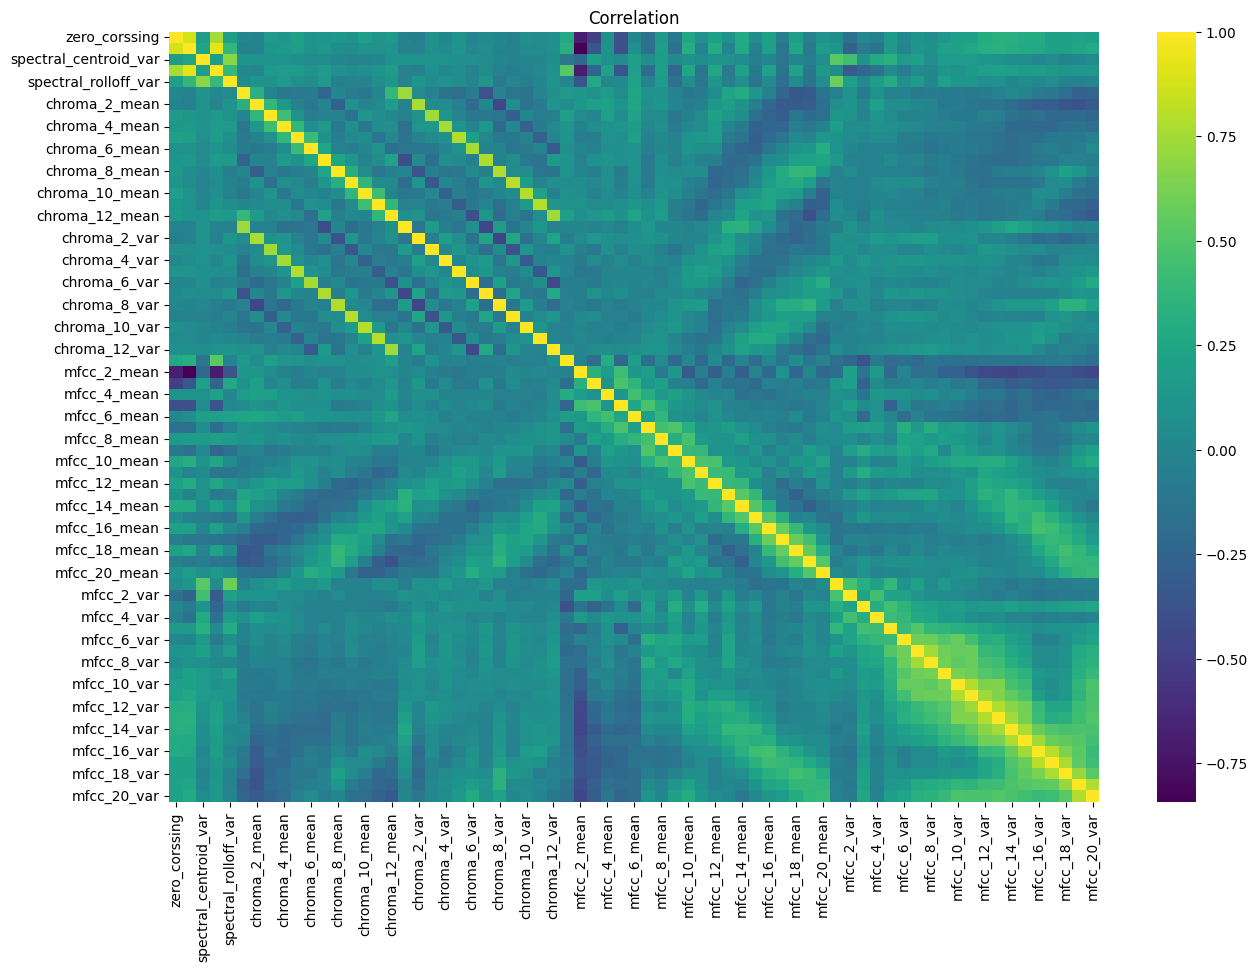

In [ ]:
plt.rcParams["figure.figsize"] = (15, 10)
sns.heatmap(X.corr(), annot=False, cmap='viridis');
plt.title('Correlation');

In [6]:
selector = VarianceThreshold(threshold=1)
selector.fit(x_train)

x_train_new = selector.transform(x_train)
x_test_new = selector.transform(x_test)

x_train.shape, x_train_new.shape, x_test.shape, x_test_new.shape

((648, 69), (648, 45), (278, 69), (278, 45))

## Part 2

In [ ]:
# Define model
SVC_L = svm.SVC(kernel='linear', random_state=6)

# Train model
SVC_L.fit(x_train_new, y_train)

# Prediction
y_pred_linear = SVC_L.predict(x_test_new)

# Accuracy score
SVC_L.score(x_test_new, y_test)

In [ ]:
Confusion_Matrix = confusion_matrix(y_test, y_pred_linear)

sns.heatmap(Confusion_Matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [9]:
# Define model
SVC_P = svm.SVC(kernel='rbf', random_state=6)

# Train model
SVC_P.fit(x_train_new, y_train)

# Prediction
y_pred_P = SVC_P.predict(x_test_new)

# Accuracy score
SVC_P.score(x_test_new, y_test)

0.18345323741007194

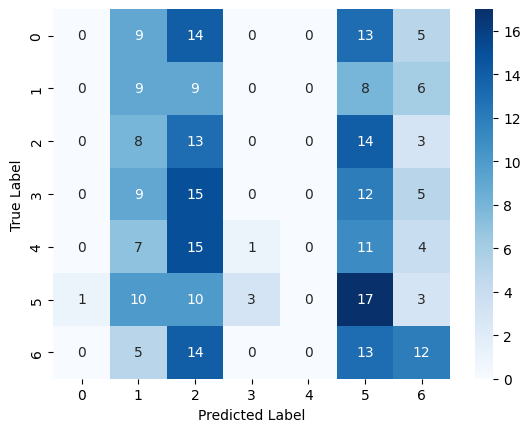

In [13]:
Confusion_Matrix = confusion_matrix(y_test, y_pred_P)

sns.heatmap(Confusion_Matrix, annot=True, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Part 3

## Part 4

In [14]:
lda = LDA(n_components = 3)
lda.fit(x_train_new, y_train)
Data_train_lda = lda.transform(x_train_new)
Data_test_lda = lda.transform(x_test_new)
Data_train_lda.shape, Data_test_lda.shape

((648, 3), (278, 3))

In [18]:
SVC_LDA = svm.SVC(kernel = 'rbf', random_state = 6)
SVC_LDA.fit(Data_train_lda, y_train)
target_SVC_LDA_pred = SVC_LDA.predict(Data_test_lda)
SVC_LDA.score(Data_test_lda, y_test)

0.2014388489208633

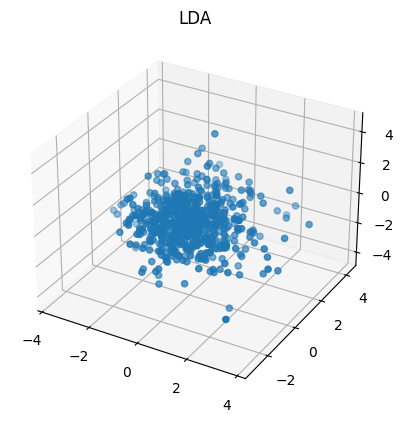

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Data_train_lda[:, 0], Data_train_lda[:, 1], Data_train_lda[:, 2])
plt.title('LDA')
plt.show()

In [15]:
pca = PCA(n_components=2, random_state=6)
pca.fit(x_train_new)
x_train_pca = pca.transform(x_train_new)
x_test_pca = pca.transform(x_test_new)
print(x_train_pca.shape, x_test_pca.shape)

(648, 2) (278, 2)


In [21]:
SVC_PCA = svm.SVC(kernel = 'rbf', random_state = 6)
SVC_PCA.fit(x_train_pca, y_train)
target_SVC_PCA_pred = SVC_PCA.predict(x_test_pca)
SVC_PCA.score(x_test_pca, y_test)

0.16546762589928057

Text(0.5, 1.0, 'PCA')

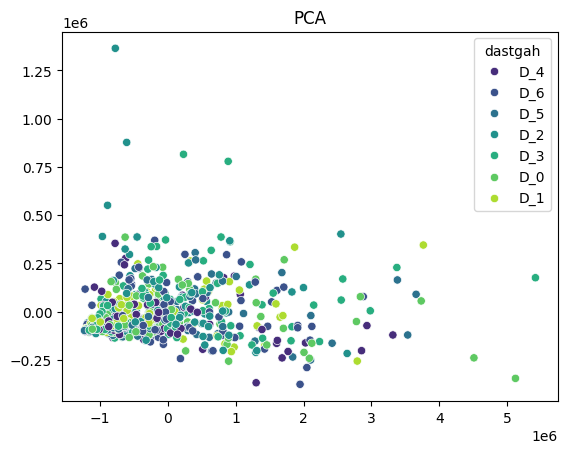

In [25]:
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train, palette='viridis')
plt.title('PCA')